In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score

In [23]:
df = pd.read_csv('./iti0202-2021.csv')
df.head(3)

,hash,path,is_app,points,style_points,time,lines_added,lines_removed,files,message,timestamp
0,8ed07c4b85ca8e908b392ba141e810b7b84953ec,.gtm/application: main.app,True,0.0,0.0,7,0,0,1,null fix,1613425513
1,d2024466706de8b697dd55ee19ec8a2defeff239,ex/ex08delivery,False,0.0,0.0,1140,117,0,6,ex08.,1616681766
2,e5949847532a923d86c76e67d7eb373b83986892,pr/pr06shelter,False,0.0,0.0,60,1,1,1,1,1615201431


In [24]:
df.describe()

,points,style_points,time,lines_added,lines_removed,files,timestamp
count,15062.000000,15062.00000,15062.000000,15062.000000,15062.000000,15062.000000,1.506200e+04
mean,2.950173,0.28781,621.503718,17.812508,3.398486,1.771080,1.614607e+09
std,5.381350,0.45466,2154.947923,99.267057,13.817016,2.450285,1.522477e+06
min,0.000000,0.00000,2.000000,0.000000,0.000000,1.000000,1.611666e+09
25%,0.000000,0.00000,42.000000,0.000000,0.000000,1.000000,1.613421e+09
50%,0.000000,0.00000,120.000000,0.000000,0.000000,1.000000,1.614473e+09
75%,3.240000,1.00000,413.000000,6.000000,2.000000,2.000000,1.615757e+09
max,29.100000,5.00000,73277.000000,7790.000000,528.000000,69.000000,1.617640e+09


In [25]:
person_task_df = df.copy()
person_task_df = person_task_df[person_task_df['is_app'] == False]
person_task_df['message_len'] = person_task_df['message'].apply(lambda x: len(str(x)))
person_task_df = person_task_df.groupby(['hash', 'path']).aggregate({
          'points': max,
          'style_points': max, 
          'time': sum,
          'lines_added': sum,
          'lines_removed': sum, 
          'files': max,
          'timestamp': 'mean',
          'message_len': 'mean' 
         })
person_task_df

points  \
hash                                     path                           
0163f19bf716a3aeda720deecfa0afb6dab53d87 ex/ex02webbrowser        0.0   
                                         ex/ex03bookshelf         0.0   
                                         ex/ex04socialnetwork     0.0   
                                         ex/ex05mysticorbs        7.9   
                                         ex/ex06files             0.0   
...                                                               ...   
f8ce8c5a768ee94c031b0fce1a62e295688bc86b pr/pr03ring              0.0   
                                         pr/pr04stock             0.0   
                                         pr/pr06shelter           0.0   
                                         tk/tk0                   5.0   
                                         tk/tk1                   5.0   

                                                               style_points  \
hash                                     path                                 
0163f19bf716a3aeda720deecfa0afb6dab53d87 ex/ex02webbrowser              0.0   
                                         ex/ex03bookshelf               0.0   
                                         ex/ex04socialnetwork           0.0   
                                         ex/ex05mysticorbs              0.0   
                                         ex/ex06files                   0.0   
...                                                                     ...   
f8ce8c5a768ee94c031b0fce1a62e295688bc86b pr/pr03ring                    0.0   
                                         pr/pr04stock                   0.0   
                                         pr/pr06shelter                 0.0   
                                         tk/tk0                         1.0   
                                         tk/tk1                         1.0   

                                                                time  \
hash                                     path                          
0163f19bf716a3aeda720deecfa0afb6dab53d87 ex/ex02webbrowser       768   
                                         ex/ex03bookshelf       4128   
                                         ex/ex04socialnetwork   1734   
                                         ex/ex05mysticorbs     12110   
                                         ex/ex06files           4064   
...                                                              ...   
f8ce8c5a768ee94c031b0fce1a62e295688bc86b pr/pr03ring            3417   
                                         pr/pr04stock           7653   
                                         pr/pr06shelter         5893   
                                         tk/tk0                 5531   
                                         tk/tk1                 3321   

                                                               lines_added  \
hash                                     path                                
0163f19bf716a3aeda720deecfa0afb6dab53d87 ex/ex02webbrowser               0   
                                         ex/ex03bookshelf              480   
                                         ex/ex04socialnetwork          188   
                                         ex/ex05mysticorbs             489   
                                         ex/ex06files                  184   
...                                                                    ...   
f8ce8c5a768ee94c031b0fce1a62e295688bc86b pr/pr03ring                   197   
                                         pr/pr04stock                  584   
                                         pr/pr06shelter                320   
                                         tk/tk0                        294   
                                         tk/tk1                        235   

                                                               lines_removed  \
hash                                     path        

In [26]:
task_df= df.copy()
task_df = task_df[task_df['is_app'] == False]
task_df['message_len'] = task_df['message'].apply(lambda x: len(str(x)))
task_df = task_df.groupby('path').aggregate({
          'points': max,
          'style_points': max, 
          'time': 'mean',
          'lines_added': 'mean',
          'lines_removed': 'mean', 
          'files': 'mean',
          'timestamp': 'mean',
          'message_len': 'mean' 
         })
task_df

,points,style_points,time,lines_added,lines_removed,files,timestamp,message_len
path,,,,,,,,
.gitignore,0.0,0.0,129.625000,0.687500,0.187500,1.000000,1.613846e+09,16.000000
.gtm/1613925862.event,0.0,0.0,6.000000,0.000000,0.000000,1.000000,1.614091e+09,14.000000
.idea/iti0202-2021.iml,0.0,0.0,240.000000,0.000000,0.000000,1.000000,1.613480e+09,11.000000
.idea/modules.xml,0.0,0.0,126.428571,0.428571,0.000000,1.000000,1.613052e+09,15.714286
.idea/workspace.xml,0.0,0.0,185.000000,0.000000,0.000000,1.000000,1.614103e+09,9.000000
...,...,...,...,...,...,...,...,...
tk/tk1,5.0,1.0,414.452830,20.878706,4.366577,1.458221,1.614312e+09,9.083558
tk/tk2,5.0,1.0,467.465217,18.778261,3.926087,1.430435,1.614555e+09,9.256522
tk/tk3,5.0,1.0,544.696970,22.333333,5.363636,1.318182,1.615910e+09,7.181818


In [27]:
person_task_df['timestamp'] = person_task_df['timestamp'] - task_df['timestamp']
person_task_df['time'] = person_task_df['time'] / task_df['time']
person_task_df['points'] = person_task_df['points'] / task_df['points']
person_task_df['style_points'] = person_task_df['style_points'] / task_df['style_points']
person_task_df['lines_added'] = person_task_df['lines_added'] / task_df['lines_added']
person_task_df['lines_removed'] = person_task_df['lines_removed'] / task_df['lines_removed']
person_task_df['message_len'] = person_task_df['message_len'] / task_df['message_len']

person_task_df = person_task_df.dropna()
person_task_df

points  \
hash                                     path                                
0163f19bf716a3aeda720deecfa0afb6dab53d87 ex/ex03bookshelf         0.000000   
                                         ex/ex05mysticorbs        0.526667   
03062dc1bddd1c4f7433fefa74079520759db3ab ex/ex00hello             1.000000   
                                         ex/ex01idcode            1.000000   
                                         ex/ex03bookshelf         0.890000   
...                                                                    ...   
f8ce8c5a768ee94c031b0fce1a62e295688bc86b lx/lx02personstatistics  1.000000   
                                         pr/pr01introduction      1.000000   
                                         pr/pr02datastructures    1.000000   
                                         tk/tk0                   1.000000   
                                         tk/tk1                   1.000000   

                                                                  style_points  \
hash                                     path                                    
0163f19bf716a3aeda720deecfa0afb6dab53d87 ex/ex03bookshelf                  0.0   
                                         ex/ex05mysticorbs                 0.0   
03062dc1bddd1c4f7433fefa74079520759db3ab ex/ex00hello                      1.0   
                                         ex/ex01idcode                     1.0   
                                         ex/ex03bookshelf                  1.0   
...                                                                        ...   
f8ce8c5a768ee94c031b0fce1a62e295688bc86b lx/lx02personstatistics           1.0   
                                         pr/pr01introduction               1.0   
                                         pr/pr02datastructures             1.0   
                                         tk/tk0                            1.0   
                                         tk/tk1                            1.0   

                                                                       time  \
hash                                     path                                 
0163f19bf716a3aeda720deecfa0afb6dab53d87 ex/ex03bookshelf          5.429896   
                                         ex/ex05mysticorbs        11.083700   
03062dc1bddd1c4f7433fefa74079520759db3ab ex/ex00hello              0.283943   
                                         ex/ex01idcode             0.215258   
                                         ex/ex03bookshelf         45.951546   
...                                                                     ...   
f8ce8c5a768ee94c031b0fce1a62e295688bc86b lx/lx02personstatistics   5.133586   
                                         pr/pr01introduction       6.210594   
                                         pr/pr02datastructures     4.191732   
                                         tk/tk0                    8.539807   
                                         tk/tk1                    8.012975   

                                                                  lines_added  \
hash                                     path                                   
0163f19bf716a3aeda720deecfa0afb6dab53d87 ex/ex03bookshelf           27.875391   
                                         ex/ex05mysticorbs          18.946276   
03062dc1bddd1c4f7433fefa74079520759db3ab ex/ex00hello                0.000000   
                                         ex/ex01idcode               0.000000   
                                         ex/ex03bookshelf           30.779078   
...                                                                       ...   
f8ce8c5a768ee94c031b0fce1a62e295688bc86b lx/lx02personstatistics     9.279256   
                                         pr/pr01introduction        14.728155   
                                         pr/pr02datastructures       6.885663   
                                         tk/tk0                    

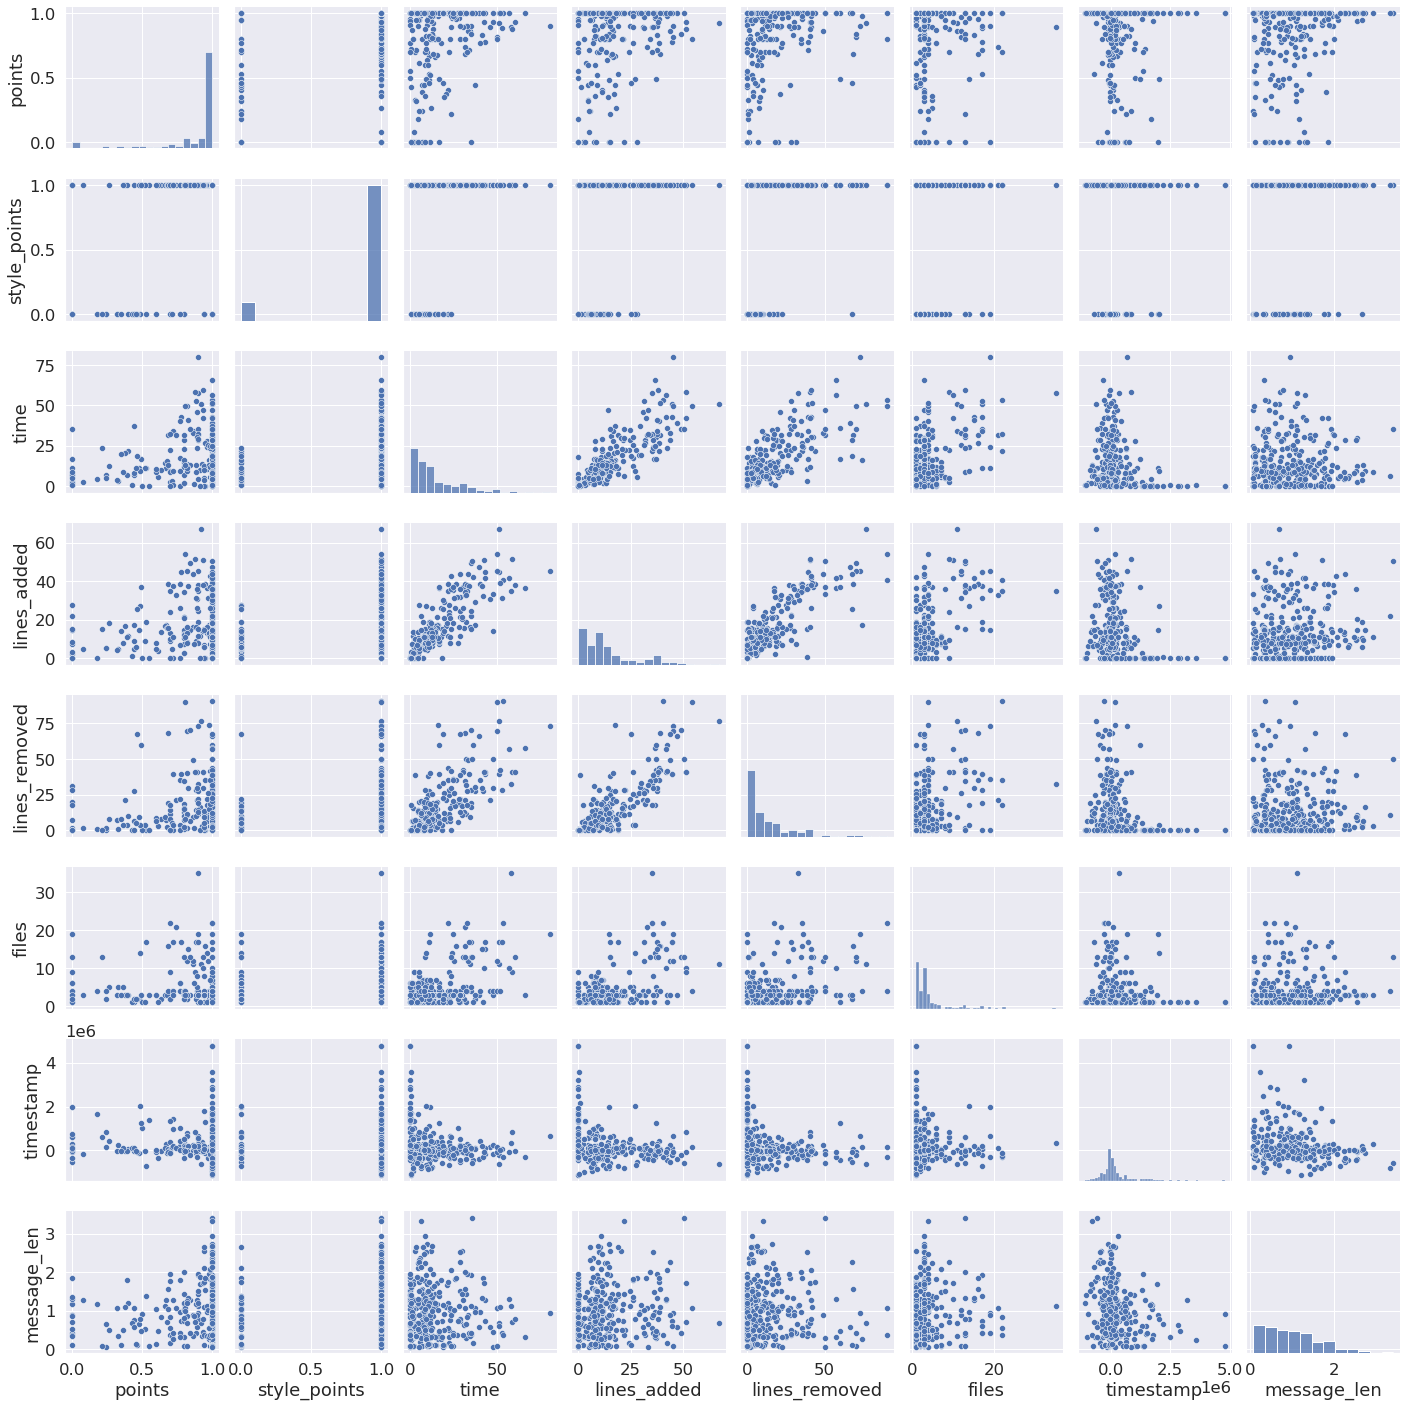

In [28]:
sns.pairplot(person_task_df)
plt.show()

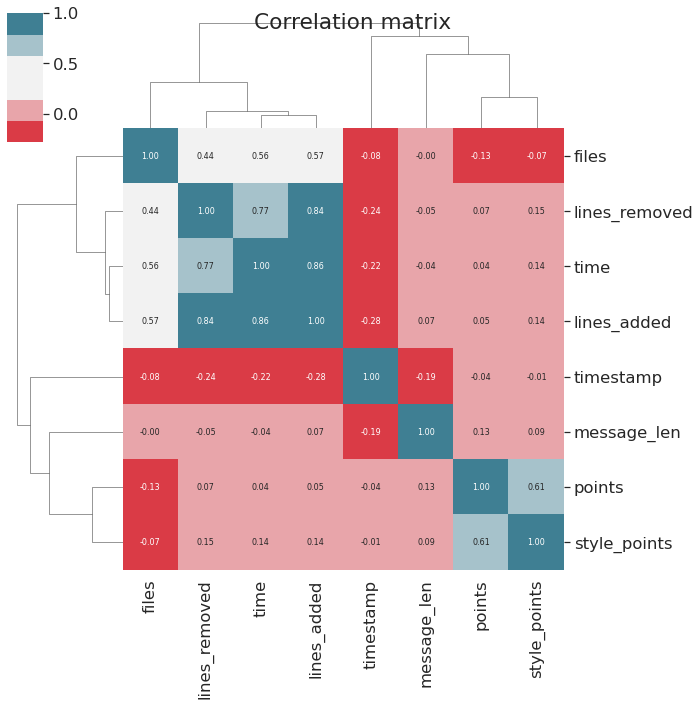

In [29]:
cm = np.corrcoef(person_task_df.T)
sns.set(font_scale=1.5)
# plt.figure(figsize = (20,5))
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
#                  annot_kws={'size': 11}, yticklabels=person_task_df.columns,
#                  xticklabels=person_task_df.columns, 
#                  cmap=sns.diverging_palette(10, 220, sep=80), linewidths=.5)
km = sns.clustermap(cm, cbar=True, annot=True,fmt='.2f',
                    annot_kws={'size': 8}, yticklabels=person_task_df.columns,
                    xticklabels=person_task_df.columns, 
                    cmap=sns.diverging_palette(10, 220, sep=80))
km.fig.suptitle('Correlation matrix') 
plt.show()

In [30]:
y = person_task_df['points']
X = person_task_df.loc[:, person_task_df.columns != 'points']
X = X.drop('style_points', axis=1)
# X

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, 
                                                    random_state=1)

In [32]:
slr = Pipeline([('ss', StandardScaler()), 
                ('lr', LinearRegression())])
slr.fit(X_train, y_train)

for col_name, x_i in zip(X.columns, slr.named_steps['lr'].coef_):
    print(f"{col_name:<15} {round(x_i, 4)}")

time            0.0452
lines_added     -0.0133
lines_removed   0.017
files           -0.0611
timestamp       0.0018
message_len     0.0405


In [33]:
scores = cross_val_score(estimator=slr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV keskmine R2 täpsus: %.3f' % np.mean(scores), "+/- %.3f" % np.std(scores))
print('Keskmine R2 täpsus treeningandmetel: %.3f' % slr.score(X_train, y_train))
print('Keskmine R2 täpsus testandmetel: %.3f' % slr.score(X_test, y_test))

CV keskmine R2 täpsus: -0.104 +/- 0.224
Keskmine R2 täpsus treeningandmetel: 0.062
Keskmine R2 täpsus testandmetel: 0.028


In [34]:
plr = Pipeline(steps = [('sc', StandardScaler()),
                        ('pf', PolynomialFeatures(degree=2)),
                        ('lr', LinearRegression())])
plr.fit(X_train, y_train)
# for power in plr.named_steps['pf'].powers_:
#     print(f"{power}")

Pipeline(steps=[('sc', StandardScaler()), ('pf', PolynomialFeatures()),
                ('lr', LinearRegression())])

In [48]:
dtr = Pipeline(steps = [('sc', StandardScaler()),
                  ('dt', DecisionTreeRegressor(max_depth=3))])
rfr = Pipeline(steps = [('sc', StandardScaler()),
                  ('rf', RandomForestRegressor(n_estimators=500, criterion='mse'))])

,time,lines_added,lines_removed,files,timestamp,message_len
count,315.000000,315.000000,315.000000,315.000000,3.150000e+02,315.000000
mean,13.901587,13.901587,13.901587,4.139683,2.008165e+05,1.000256
std,14.341026,13.399208,17.695327,4.693760,7.493303e+05,0.677137
min,0.009160,0.000000,0.000000,1.000000,-1.099837e+06,0.074030
25%,3.229070,4.648623,0.819449,1.000000,-1.299700e+05,0.416408
50%,9.649583,10.351622,7.271186,3.000000,2.650847e+04,0.905660
75%,19.490011,18.137227,18.940605,4.000000,2.492257e+05,1.405200
max,79.874026,66.990004,90.489470,35.000000,4.780290e+06,3.419039


In [36]:
pipes = {'linear_rtegression': slr,
         'polynomial_regression': plr,
         'decision_tree_regressor': dtr,
         'random_forest_regrossor': rfr}
for name, pipe in pipes.items():
    print(f"{'='*15} [ {name} ] {'='*15}")
    pipe.fit(X_train, y_train)
    scores = cross_val_score(estimator=pipe,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             n_jobs=1)
    print('CV keskmine täpsus: %.3f' % np.mean(scores), "+/- %.3f" % np.std(scores))
    print('Täpsus R2 treeningandmetel: %.3f' % pipe.score(X_train, y_train) )
    print('Täpsus R2 testandmetel: %.3f' % pipe.score(X_test, y_test))

=============== [ linear_rtegression ] ===============
CV keskmine täpsus: -0.104 +/- 0.224
Täpsus R2 treeningandmetel: 0.062
Täpsus R2 testandmetel: 0.028
=============== [ polynomial_regression ] ===============
CV keskmine täpsus: -0.421 +/- 0.708
Täpsus R2 treeningandmetel: 0.164
Täpsus R2 testandmetel: 0.090
=============== [ decision_tree_regressor ] ===============
CV keskmine täpsus: -0.336 +/- 0.391
Täpsus R2 treeningandmetel: 0.276
Täpsus R2 testandmetel: 0.154
=============== [ random_forest_regrossor ] ===============
CV keskmine täpsus: -0.090 +/- 0.277
Täpsus R2 treeningandmetel: 0.878
Täpsus R2 testandmetel: 0.169


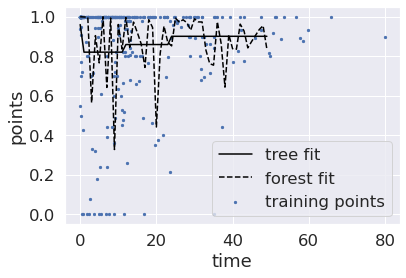

In [45]:
X_time = X['time'].values.reshape(-1, 1)
dtr.fit(X_time, y)
rfr.fit(X_time, y)

plt.scatter(X['time'], y, label="training points", s=5)
X_fit = np.arange(0, 50, 1).reshape(-1, 1)
y_tree_fit = dtr.predict(X_fit)
y_forest_fit = rfr.predict(X_fit)
plt.plot(X_fit, y_tree_fit, label='tree fit', color='black')
plt.plot(X_fit, y_forest_fit, label='forest fit', linestyle='--', color='black')
plt.legend()
plt.xlabel('time')
plt.ylabel('points')
plt.show()

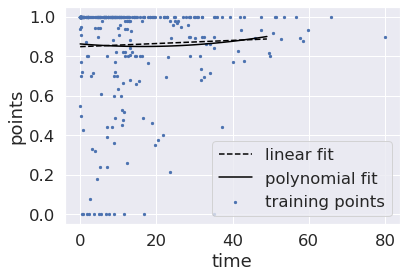

In [47]:
X_time = X['time'].values.reshape(-1, 1)
slr.fit(X_time, y)
plr.fit(X_time, y)

plt.scatter(X_time, y, label="training points", s=5)
X_fit = np.arange(0, 50, 1).reshape(-1, 1)
y_lin_fit = lr.predict(X_fit)
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--', color='black')
y_pol_fit = plr.predict(X_fit)
plt.plot(X_fit, y_pol_fit, label='polynomial fit', color='black')
plt.legend()
plt.xlabel('time')
plt.ylabel('points')
plt.show()